In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
tqdm.pandas()
pd.set_option("display.max_columns", None)

# Student_log

In [2]:
#path = ':\\Users\\shahr\\code\\GPF_Qazi\\Qazi_data\\processed\\sess1819sem2\\'
path = 'D:\\Data\\Spectrum\\Qazi_data\\processed\\sess1819sem2\\'


student_log = pd.read_csv(f"{path}student_log.csv")
student_log["timecreated"] = pd.to_datetime(student_log["timecreated"], unit="s")
student_log = student_log[(student_log.timecreated >= pd.to_datetime("18-02-2019", format="%d-%m-%Y")) & (student_log.timecreated <= pd.to_datetime("30-06-2019", format="%d-%m-%Y"))].copy()

In [3]:
print(student_log.shape)

(23922462, 21)


In [4]:
print(student_log.columns)
student_log.sample(5)

Index(['id', 'eventname', 'component', 'action', 'target', 'objecttable',
       'objectid', 'crud', 'edulevel', 'contextid', 'contextlevel',
       'contextinstanceid', 'userid', 'courseid', 'relateduserid', 'anonymous',
       'other', 'timecreated', 'origin', 'ip', 'realuserid'],
      dtype='object')


,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid
10895779,15755863,\mod_resource\event\course_module_viewed,mod_resource,viewed,course_module,resource,41469.0,r,2,191058,70,78996,13147,2447,NaN,0,N;,2019-02-20 06:16:53,web,192.168.90.44,NaN
32193709,41572328,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,2,50,1,8926,1,NaN,0,N;,2019-06-17 03:19:08,ws,192.168.90.44,NaN
13012403,18412188,\mod_assign\event\submission_status_viewed,mod_assign,viewed,submission_status,NaN,NaN,r,0,195856,70,82087,17857,4373,NaN,0,"a:1:{s:8:""assignid"";s:4:""7010"";}",2019-03-03 13:59:58,web,192.168.90.44,NaN
23139577,30765181,\core\event\course_module_completion_updated,core,updated,course_module_completion,course_modules_completion,17336.0,u,2,48216,70,7588,14568,2159,14568.0,0,"a:1:{s:13:""relateduserid"";s:5:""14568"";}",2019-04-25 14:56:18,web,192.168.90.44,NaN
13829008,19387392,\mod_resource\event\course_module_viewed,mod_resource,viewed,course_module,resource,40764.0,r,2,188763,70,77730,8162,3267,NaN,0,N;,2019-03-06 07:20:01,web,192.168.90.44,NaN


In [5]:
student_log[student_log["component"]=="mod_quiz"]

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid
16405,20126570,\mod_quiz\event\course_module_viewed,mod_quiz,viewed,course_module,quiz,1062.0,r,2,168874,70,64495,14607,2448,NaN,0,N;,2019-03-10 08:27:12,web,192.168.90.44,NaN
22453,20126042,\mod_quiz\event\course_module_viewed,mod_quiz,viewed,course_module,quiz,1160.0,r,2,176408,70,69576,12897,4438,NaN,0,N;,2019-03-10 08:23:28,web,192.168.90.44,NaN
25857,20126635,\mod_quiz\event\course_module_viewed,mod_quiz,viewed,course_module,quiz,1063.0,r,2,168879,70,64500,14607,2448,NaN,0,N;,2019-03-10 08:27:56,web,192.168.90.44,NaN
28129,20126697,\mod_quiz\event\course_module_viewed,mod_quiz,viewed,course_module,quiz,1397.0,r,2,198137,70,83490,19757,4864,NaN,0,N;,2019-03-10 08:28:30,web,192.168.90.44,NaN
37892,20125779,\mod_quiz\event\course_module_viewed,mod_quiz,viewed,course_module,quiz,1449.0,r,2,207053,70,88329,6372,3727,NaN,0,N;,2019-03-10 08:21:41,web,192.168.90.44,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36133029,20123225,\mod_quiz\event\attempt_viewed,mod_quiz,viewed,attempt,quiz_attempts,20795.0,r,2,165783,70,63117,9359,4819,9359.0,0,"a:1:{s:6:""quizid"";s:4:""1031"";}",2019-03-10 08:04:39,web,192.168.90.44,NaN
36133093,20122992,\mod_quiz\event\attempt_reviewed,mod_quiz,reviewed,attempt,quiz_attempts,20792.0,r,1,225687,70,100903,21383,3194,21383.0,0,"a:1:{s:6:""quizid"";s:4:""1601"";}",2019-03-10 08:03:04,ws,192.168.90.44,NaN
36138554,20125790,\mod_quiz\event\attempt_viewed,mod_quiz,viewed,attempt,quiz_attempts,19783.0,r,2,207053,70,88329,6372,3727,6372.0,0,"a:1:{s:6:""quizid"";s:4:""1449"";}",2019-03-10 08:21:45,web,192.168.90.44,NaN
36198215,20126667,\mod_quiz\event\course_module_viewed,mod_quiz,viewed,course_module,quiz,1063.0,r,2,168879,70,64500,14607,2448,NaN,0,N;,2019-03-10 08:28:13,web,192.168.90.44,NaN


In [6]:
student_log["userid"].nunique()

19693

In [7]:
#student_log2.to_csv('student_log2.csv')

student_log2 = student_log[['userid','edulevel']].groupby(by=['userid']).sum()
print(student_log2.shape)
student_log2.head()

#student_log2.to_csv('student_log2.csv')

(19693, 1)


,edulevel
userid,
64,3726
65,1192
66,4532
67,2276
68,3190


# Grade (final_grade_df2)

In [8]:
final_grade_df2 = pd.read_csv("./final_grade_df2.csv")

print(final_grade_df2.shape)
#final_grade_df2.info()q

final_grade_df2 = final_grade_df2.drop(columns='Unnamed: 0')
final_grade_df2.head()

(18576, 6)


,userid,idnumber,NO_MATRIK_LAMA,number_of_courses,total_marks
0,64,WIF160010,WIF160010,6.0,362.90
1,65,WIF160052,WIF160052,6.0,321.90
2,66,WIE160015,WIE160015,7.0,472.60
3,67,WIC160061,WIC160061,6.0,429.40
4,68,WIC160008,WIC160008,7.0,600.48


## Grade -publish


In [9]:
final_grade_df3 = pd.merge(final_grade_df2,student_log2,how='inner', on='userid').drop(columns=['edulevel'])
print(final_grade_df3.shape)
final_grade_df3.head(3)

(16909, 5)


,userid,idnumber,NO_MATRIK_LAMA,number_of_courses,total_marks
0,64,WIF160010,WIF160010,6.0,362.9
1,65,WIF160052,WIF160052,6.0,321.9
2,66,WIE160015,WIE160015,7.0,472.6


# Grade detail

In [10]:
matrik = pd.read_csv("./matrik.csv")
cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")
cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].value_counts()
avg_grade_marks = {
    "A+": 95,
    "A": 85,
    "A-": 77,
    "B+": 73,
    "B": 67,
    "B-": 63,
    "C+": 57,
    "C": 53,
    "C-": 47,
    "D+": 43,
    "D": 37,
    "F": 18
}
cam_cmr.loc[cam_cmr["Formatted agreed mark"] > 100, "Formatted agreed mark"] = cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].progress_apply(lambda x: avg_grade_marks[x])

# Combine two files(matrik + cam_cmr) into grade data
grade_df = cam_cmr.merge(matrik, left_on = "Student Candidate Number", right_on="NO_MATRIK")
print('before dropna',grade_df.shape)

# Remove formatted agreed mark that is null value
grade_df = grade_df.dropna(subset=["Formatted agreed mark"])
print('after dropna',grade_df.shape)
grade_df

C:\Users\shahr\AppData\Local\Temp\ipykernel_19048\648490092.py:2: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")
100%|██████████| 1010/1010 [00:00<00:00, 443864.95it/s]


before dropna (109319, 99)
after dropna (99212, 99)


,SPR Code,Module code,Occurrence,Academic Year code,Period Slot code,Academic Year code.1,Start Period Slot code,Actual mark - DB field,Actual grade,Actual mark check digit,Agreed mark - DB field,Agreed grade,Agreed mark check digit,Credits Passed,Result of Module,Filler,Sortname,Formatted display Non-db,Formatted agreed mark,Current Attempt,Completed number,Initial SAS status,Process Status,Process status,Year of entry,Scheme code,Level code,Credit Value,Level rank,Mark Scheme code,Validating Body code,Student Candidate Number,Title,Number of periods,high mark,high grade,Re-take module,Registration type code,Module Selection Status,Calculated Mark,Formatted Display Non DB,Calculated Grade,Latest Mark,Formatted Display Non DB.1,Latest Grade,Final assess date,SCJ Code,SCE Sequence,Reason Failure,User Defined Field 02,User Defined Field 03,User Defined Field 04,User Defined Field 05,User Defined Field 06,User Defined Field 07,User Defined Field 08,User Defined Field 09,User Defined Field 10,User Defined Field 11,User Defined Field 12,User Defined Field 13,User Defined Field 14,User Defined Field 15,User Defined Field 16,User Defined Field 17,User Defined Field 18,User Defined Field 19,User Defined Field 20,Unscaled Mark,Unscaled Mark.1,Unscaled Grade,Scaling Status,First Attempt Mark,First Att. Mark,First Attempt Grade,Diet code,PDM Sequence,Percent taught celtic,Re-assessment Mode,MMR Check status,Skip Generation,Actual Grade Point,Actual Grade Pt,Agreed Grade Point,Agreed Grade Pt,Calculated Grade Point,Calc Grade Point,Latest Grade Point,Latest Grade Pt.,First Grade Point,First Grade Pt.,Unscaled Grade Point,Unscaled GradePt,Highest Grade Point,NO_MATRIK,NO_MATRIK_LAMA,SESI_MASUK,STATUS_PENGAJIAN,FAKULTI
0,17000016/2,AVA8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,A RAHMAN,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000016/2,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSAVACV001_2017_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000016/2,AVA170037,2017,LPT,A
1,17000187/3,LXHA8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,VEERIAH,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000187/3,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSLHACV001_2011_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000187/3,LHA140014,2014,AK,L
2,17000330/3,AOF7001,1,2018,R2,2018.0,R2,7500.0,A-,NaN,7500.0,A-,NaN,3.0,P,NaN,MOHD SAID,75.0,75.0,1,1,A,COM,A,2018.0,UM,4,3,NaN,MPG000,NaN,17000330/3,NaN,NaN,7500.0,A-,NaN,NaN,KT0,7500.0,NaN,A-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,A-,SMMAOFCV000_2017_001,10.0,NaN,NaN,NaN,NaN,370.0,NaN,370.0,NaN,370.0,NaN,NaN,NaN,370.0,NaN,NaN,NaN,370.0,17000330/3,AOF180019,2018,TDU,A
3,17000349/2,TXGX8002,1,2018,R2,2018.0,R2,0.0,CN,NaN,0.0,CN,NaN,0.0,P,NaN,MOHD DIN A,0.0,0.0,1,1,A,COM,A,2018.0,UM,5,1,NaN,MPG003,NaN,17000349/2,NaN,NaN,0.0,CN,NaN,NaN,KT0,0.0,NaN,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,CN,KRSTHACV001_2011_001,10.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,17000349/2,THA160026,2016,AK,T
4,17000628/2,WQD7002,P2,2018,S2,2018.0,S2,8460.0,A,NaN,8460.0,A,NaN,10.0,P,NaN,TAN,84.6,84.6,1,1,A,COM,A,2018.0,UM,4,10,NaN,MPG000,NaN,17000628/2,NaN,NaN,8460.0,A,NaN,NaN,KT0,8460.0,NaN,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8460.0,NaN,A,SCWWQDCV000_2017_001,20.0,NaN,NaN,NaN,NaN,400.0,NaN,400.0,NaN,400.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,400.0,17000628/2,WQD170011,2017,GR,W
...,...,...,...,...,...,...,...,

In [11]:
grade_df2 = grade_df[['NO_MATRIK_LAMA','Module code','Formatted agreed mark','Actual grade']]
print('No of students:',grade_df2.NO_MATRIK_LAMA.nunique())
print('No of courses:',grade_df2['Module code'].nunique())

grade_df2.head()

No of students: 22275
No of courses: 2877


,NO_MATRIK_LAMA,Module code,Formatted agreed mark,Actual grade
0,AVA170037,AVA8002,0.0,CN
1,LHA140014,LXHA8002,0.0,CN
2,AOF180019,AOF7001,75.0,A-
3,THA160026,TXGX8002,0.0,CN
4,WQD170011,WQD7002,84.6,A


In [12]:
grade_df3 = grade_df2.groupby('NO_MATRIK_LAMA').sum()
#grade_df3 = grade_df2.groupby('Module code')

print(grade_df3.shape)
grade_df3.head()

(22275, 3)


,Module code,Formatted agreed mark,Actual grade
NO_MATRIK_LAMA,,,
AEB150023,AII3009AII3010,148.0,BA
AEC150006,AIC4001,93.0,A+
AEC150013,AIC1003AIF2020AIF3019AIX2005AIX3005,324.0,C+BBBB+
AEC150015,AIC3004GIR1002,121.0,CB+
AEC150020,AIC4001,87.0,A


In [13]:
final = pd.read_csv("./final.csv")

grade_df2 = final[["userid", "idnumber"]].merge(grade_df2, left_on="idnumber", right_on="NO_MATRIK_LAMA")
grade_df2.info()
grade_df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95226 entries, 0 to 95225
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 95226 non-null  int64  
 1   idnumber               95226 non-null  object 
 2   NO_MATRIK_LAMA         95226 non-null  object 
 3   Module code            95226 non-null  object 
 4   Formatted agreed mark  95226 non-null  float64
 5   Actual grade           94905 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ MB


,userid,idnumber,NO_MATRIK_LAMA,Module code,Formatted agreed mark,Actual grade
0,64,WIF160010,WIF160010,WIA3002,68.5,B
1,64,WIF160010,WIF160010,WIF3001,62.0,B-
2,64,WIF160010,WIF160010,WIF3002,63.5,B-
3,64,WIF160010,WIF160010,WIF3003,46.1,C-
4,64,WIF160010,WIF160010,WIF3004,57.8,C+


In [14]:
grade_df_marks = grade_df2[['userid','Module code','Formatted agreed mark']]
grade_df_marks.groupby('userid').agg('sum')

,Module code,Formatted agreed mark
userid,,
64,WIA3002WIF3001WIF3002WIF3003WIF3004WIX3001,362.90
65,WIA3002WIF3001WIF3002WIF3003WIF3004WIX3001,321.90
66,GLT1009WIA3002WIE3002WIE3003WIE3004WIE3011WIX3005,472.60
67,WIA3002WIC3001WIC3002WIC3003WIC3008WIX3005,429.40
68,GLT1012WIA3002WIC2001WIC3001WIC3003WIC3008WIX3005,600.48
...,...,...
28186,IMC7002IOF7002IOX7003,0.00
28194,KXGX8002,0.00
28219,SHGD6180,0.00


In [15]:
#grade_df2.to_csv('grade_df2.csv')
grade_df2['userid'].nunique()

18576

In [16]:
userid_list = student_log['userid'].unique()
grade_df3 = grade_df2[grade_df2['userid'].isin(userid_list)]
print(grade_df3.shape)

(93199, 6)


In [17]:
grade_df3['userid'].nunique()

16909

In [18]:
grade_df3.head(3)

,userid,idnumber,NO_MATRIK_LAMA,Module code,Formatted agreed mark,Actual grade
0,64,WIF160010,WIF160010,WIA3002,68.5,B
1,64,WIF160010,WIF160010,WIF3001,62.0,B-
2,64,WIF160010,WIF160010,WIF3002,63.5,B-


## Grade detail-publish

In [19]:
grade_detail_publish = grade_df3[['userid','Module code','Formatted agreed mark','Actual grade']]
grade_detail_publish = grade_detail_publish.rename(columns={"Module code":"courseid"})

grade_detail_publish.head(3)

,userid,courseid,Formatted agreed mark,Actual grade
0,64,WIA3002,68.5,B
1,64,WIF3001,62.0,B-
2,64,WIF3002,63.5,B-


In [20]:
# Sanity check
grade_detail_publish.info()
grade_detail_publish.isna().sum()   # a little bit of missing values 

<class 'pandas.core.frame.DataFrame'>
Index: 93199 entries, 0 to 95222
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 93199 non-null  int64  
 1   courseid               93199 non-null  object 
 2   Formatted agreed mark  93199 non-null  float64
 3   Actual grade           92948 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.6+ MB


userid                     0
courseid                   0
Formatted agreed mark      0
Actual grade             251
dtype: int64

In [21]:
# Sanity check 2

test = grade_detail_publish[['userid','courseid','Formatted agreed mark']].groupby(by=['userid']).sum()
print(test.shape) # sanity check ok. tallies at 16909
test.head()


(16909, 2)


,courseid,Formatted agreed mark
userid,,
64,WIA3002WIF3001WIF3002WIF3003WIF3004WIX3001,362.90
65,WIA3002WIF3001WIF3002WIF3003WIF3004WIX3001,321.90
66,GLT1009WIA3002WIE3002WIE3003WIE3004WIE3011WIX3005,472.60
67,WIA3002WIC3001WIC3002WIC3003WIC3008WIX3005,429.40
68,GLT1012WIA3002WIC2001WIC3001WIC3003WIC3008WIX3005,600.48


### Anonymise courseid

In [22]:
path = 'C:\\Users\\shahr\\code\\GPF_Qazi\\Phase2-Data_Exploration\\'

course_consolidated = pd.read_csv(f'{path}\\course_consolidated.csv')
course_consolidated.head()

,id,category,code,faculty
0,5104,40,ERI,Epigeum
1,4298,18,SIJ3004,Faculty of Science
2,5114,18,CNU046,Faculty of Science
3,4277,18,SIP1004,Faculty of Science
4,4358,18,SIO2005,Faculty of Science


In [23]:
course_consolidated['category'].nunique()
course_consolidated['faculty'].nunique()


37

In [24]:
course_consolidated[course_consolidated['id']==91]

,id,category,code,faculty
2611,91,19,WRES3108,Faculty of Computer Science & Information Tech...


<Axes: xlabel='faculty'>

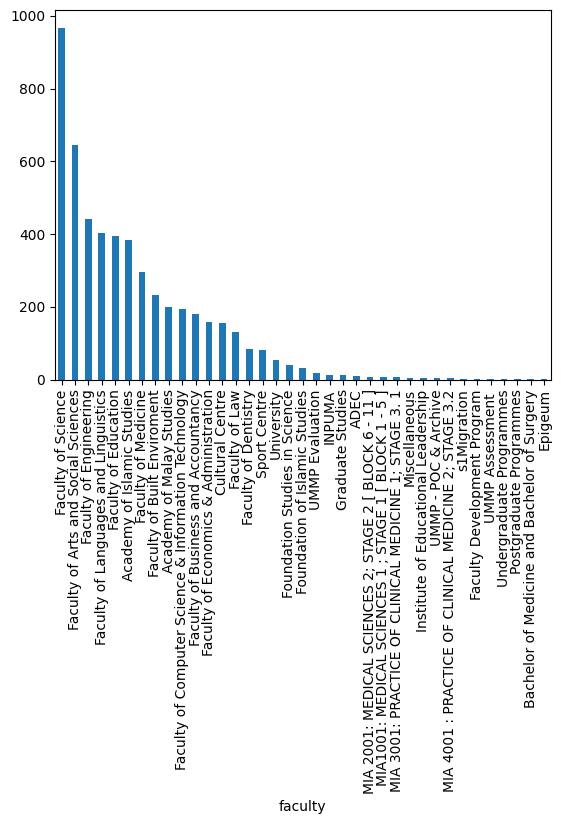

In [25]:
#course_consolidated['faculty'].nunique()
course_consolidated['faculty'].value_counts().plot(kind='bar')

In [26]:
course_consolidated[course_consolidated['id']==2447]

,id,category,code,faculty
1015,2447,3,GIG1005,University


In [27]:
print(grade_detail_publish.shape)
print(grade_detail_publish['userid'].nunique())

grade_detail_publish.head()

(93199, 4)
16909


,userid,courseid,Formatted agreed mark,Actual grade
0,64,WIA3002,68.5,B
1,64,WIF3001,62.0,B-
2,64,WIF3002,63.5,B-
3,64,WIF3003,46.1,C-
4,64,WIF3004,57.8,C+


In [28]:
grade_detail_publish = grade_detail_publish.merge(course_consolidated, left_on='courseid',right_on='code')
print(grade_detail_publish.shape)
print(grade_detail_publish['faculty'].nunique())
grade_detail_publish.head()

(90089, 8)
21


,userid,courseid,Formatted agreed mark,Actual grade,id,category,code,faculty
0,64,WIA3002,68.5,B,109,19,WIA3002,Faculty of Computer Science & Information Tech...
1,65,WIA3002,66.5,B,109,19,WIA3002,Faculty of Computer Science & Information Tech...
2,66,WIA3002,76.6,A-,109,19,WIA3002,Faculty of Computer Science & Information Tech...
3,67,WIA3002,87.5,A,109,19,WIA3002,Faculty of Computer Science & Information Tech...
4,68,WIA3002,91.0,A+,109,19,WIA3002,Faculty of Computer Science & Information Tech...


In [29]:
print(grade_detail_publish['userid'].nunique())

print(grade_detail_publish['courseid'].nunique())
print(grade_detail_publish['id'].nunique())

grade_detail_publish[grade_detail_publish['userid']==64]


16352
2407
2407


,userid,courseid,Formatted agreed mark,Actual grade,id,category,code,faculty
0,64,WIA3002,68.5,B,109,19,WIA3002,Faculty of Computer Science & Information Tech...
113,64,WIF3001,62.0,B-,4547,19,WIF3001,Faculty of Computer Science & Information Tech...
165,64,WIF3002,63.5,B-,4548,19,WIF3002,Faculty of Computer Science & Information Tech...
224,64,WIF3003,46.1,C-,4549,19,WIF3003,Faculty of Computer Science & Information Tech...
266,64,WIF3004,57.8,C+,3239,19,WIF3004,Faculty of Computer Science & Information Tech...
315,64,WIX3001,65.0,B,4557,19,WIX3001,Faculty of Computer Science & Information Tech...


In [30]:
grade_detail_publish = grade_detail_publish[['userid','id','Formatted agreed mark','Actual grade','faculty']]


In [31]:
print(grade_detail_publish['userid'].nunique())
print(grade_detail_publish['id'].nunique())
print(grade_detail_publish['faculty'].nunique())
print(grade_detail_publish.shape)
grade_detail_publish.head()
#grade_detail_publish.to_csv('grade_detail_publish.csv')

16352
2407
21
(90089, 5)


,userid,id,Formatted agreed mark,Actual grade,faculty
0,64,109,68.5,B,Faculty of Computer Science & Information Tech...
1,65,109,66.5,B,Faculty of Computer Science & Information Tech...
2,66,109,76.6,A-,Faculty of Computer Science & Information Tech...
3,67,109,87.5,A,Faculty of Computer Science & Information Tech...
4,68,109,91.0,A+,Faculty of Computer Science & Information Tech...


# Student_activity_summary (final_df3)
final_df3 is normalized data (by number of courses)

In [32]:
final_df3 = pd.read_csv("./final_df3.csv")

In [33]:
final_df3.shape

(18576, 21)

In [34]:
final_df4 = pd.merge(final_df3,student_log2,how='inner', on='userid').drop(columns=['edulevel'])
print(final_df4.shape)
final_df4.head(3)

(16909, 21)


,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
0,64.0,6.0,60.483333,28.000000,4.000000,24.000000,7.166667,5.500000,5.333333,6.833333,1.666667,1.500000,213.666667,0.333333,0.166667,2.666667,0.000000,2.833333,0.666667,1.333333,0.0
1,65.0,6.0,53.650000,14.666667,0.833333,13.833333,4.833333,2.500000,2.333333,4.166667,0.333333,0.500000,40.166667,0.166667,0.166667,1.833333,0.000000,1.500000,0.833333,1.833333,0.0
2,66.0,7.0,67.514286,21.000000,3.428571,17.571429,9.000000,4.428571,1.714286,5.428571,0.142857,0.285714,215.428571,0.000000,0.000000,4.142857,0.285714,0.428571,0.142857,0.142857,0.0


## Student_activity_summary -publish

In [35]:
Student_activity_summary = final_df4
#Student_activity_summary.to_csv('Student_activity_summary.csv')

# Student_log

In [36]:
print(student_log.columns)
print(student_log.shape)
print(student_log['userid'].nunique())
student_log.head()

Index(['id', 'eventname', 'component', 'action', 'target', 'objecttable',
       'objectid', 'crud', 'edulevel', 'contextid', 'contextlevel',
       'contextinstanceid', 'userid', 'courseid', 'relateduserid', 'anonymous',
       'other', 'timecreated', 'origin', 'ip', 'realuserid'],
      dtype='object')
(23922462, 21)
19693


,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid
179,20125308,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,2,50,1,2583,1,NaN,0,N;,2019-03-10 08:18:36,web,192.168.90.44,NaN
180,20125378,\mod_forum\event\discussion_viewed,mod_forum,viewed,discussion,forum_discussions,13917.0,r,2,224388,70,100172,24773,4106,NaN,0,N;,2019-03-10 08:19:05,web,192.168.90.44,NaN
181,20125442,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,149506,50,3752,6473,3752,NaN,0,N;,2019-03-10 08:19:38,web,192.168.90.44,NaN
182,20125502,\mod_forum\event\discussion_viewed,mod_forum,viewed,discussion,forum_discussions,13232.0,r,2,212891,70,91608,24507,2728,NaN,0,N;,2019-03-10 08:20:02,web,192.168.90.44,NaN
183,20125567,\mod_resource\event\course_module_viewed,mod_resource,viewed,course_module,resource,45230.0,r,2,201109,70,85150,13155,1358,NaN,0,N;,2019-03-10 08:20:23,web,192.168.90.44,NaN


In [37]:
student_log3 = pd.merge(student_log,final_grade_df2,how='inner', on='userid')
#student_log3 = pd.merge(student_log2,final_df,how='inner', on='userid')

student_log3.shape

(22552876, 25)

In [38]:
student_log3['userid'].nunique()

16909

In [39]:
student_log3.head()

,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid,idnumber,NO_MATRIK_LAMA,number_of_courses,total_marks
0,20125308,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,2,50,1,2583,1,NaN,0,N;,2019-03-10 08:18:36,web,192.168.90.44,NaN,MIB160031,MIB160031,7.0,464.5
1,20125321,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,156857,50,4802,2583,4802,NaN,0,N;,2019-03-10 08:18:42,web,192.168.90.44,NaN,MIB160031,MIB160031,7.0,464.5
2,20125328,\mod_resource\event\course_module_viewed,mod_resource,viewed,course_module,resource,52823.0,r,2,225467,70,100780,2583,4802,NaN,0,N;,2019-03-10 08:18:47,web,192.168.90.44,NaN,MIB160031,MIB160031,7.0,464.5
3,15006506,\core\event\message_viewed,core,viewed,message,message_read,563809.0,c,0,21701,30,2583,2583,0,2893.0,0,"a:1:{s:9:""messageid"";i:566429;}",2019-02-18 01:30:21,cli,NaN,NaN,MIB160031,MIB160031,7.0,464.5
4,15596805,\core\event\user_loggedin,core,loggedin,user,user,2583.0,r,0,1,10,0,2583,0,NaN,0,"a:1:{s:8:""username"";s:30:""shahrinsafar@perdana...",2019-02-19 15:31:00,web,192.168.90.44,NaN,MIB160031,MIB160031,7.0,464.5


In [40]:
student_log4 = student_log3[['eventname','component','action','target','objecttable','userid','courseid','timecreated']]
student_log4.head(3)

,eventname,component,action,target,objecttable,userid,courseid,timecreated
0,\core\event\course_viewed,core,viewed,course,NaN,2583,1,2019-03-10 08:18:36
1,\core\event\course_viewed,core,viewed,course,NaN,2583,4802,2019-03-10 08:18:42
2,\mod_resource\event\course_module_viewed,mod_resource,viewed,course_module,resource,2583,4802,2019-03-10 08:18:47


In [41]:
for col in student_log4.columns:
    print(f'{col}:{student_log4[col].nunique()}')

eventname:207
component:36
action:45
target:84
objecttable:68
userid:16909
courseid:2828
timecreated:7114232


## Student_log -publish

In [42]:
student_log5 = student_log4[student_log4['courseid']>1]
student_log5.shape

(12139424, 8)

In [43]:
student_log5['courseid'].nunique()

2826

In [44]:
student_log5['userid'].nunique()
student_log5['courseid'].nunique()


2826

In [45]:
#student_log5.to_csv('Student_log.csv')

# EDA Student_log

## Component

In [46]:
def unique_info(col_name):
    print(student_log4[col_name].nunique())
    print(student_log4[col_name].unique())

unique_info('component')

36
['core' 'mod_resource' 'mod_folder' 'mod_forum' 'mod_assign'
 'assignsubmission_file' 'mod_quiz' 'mod_url' 'gradereport_user'
 'gradereport_overview' 'mod_choice' 'mod_attendance' 'mod_choicegroup'
 'mod_page' 'mod_chat' 'mod_turnitintooltwo' 'mod_questionnaire' 'mod_hvp'
 'assignsubmission_onlinetext' 'mod_data' 'assignsubmission_comments'
 'mod_feedback' 'mod_wiki' 'mod_lti' 'mod_glossary' 'mod_book'
 'mod_workshop' 'mod_survey' 'mod_lesson' 'mod_scorm' 'booktool_print'
 'report_log' 'tool_usertours' 'tool_recyclebin' 'gradereport_grader'
 'report_outline']


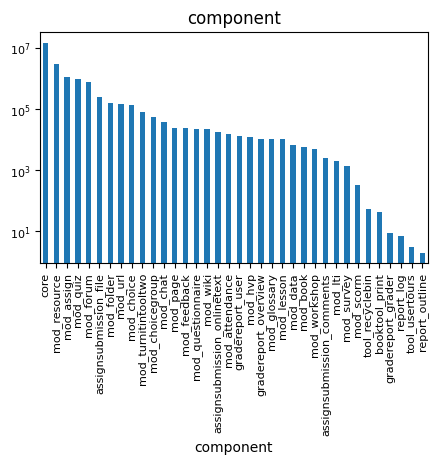

In [47]:
#student_log4['component'].value_counts()
student_log4['component'].value_counts().plot(kind='bar',title='component',logy=True,fontsize=8)

def plot_bar(colName, figsize=(5,3)):
    col=colName
    student_log4[col].value_counts().plot(kind='bar',title=col,logy=True,fontsize=8, figsize=figsize)

plot_bar('component')

### Percentage

In [48]:
x = student_log4['component'].value_counts()
#x.sum()

In [49]:
x = x/x.sum() *100

In [50]:
x

component
core                           67.979875
mod_resource                   13.975916
mod_assign                      5.096689
mod_quiz                        4.538800
mod_forum                       3.517543
assignsubmission_file           1.156163
mod_folder                      0.733365
mod_url                         0.683602
mod_choice                      0.607204
mod_turnitintooltwo             0.350629
mod_choicegroup                 0.258641
mod_chat                        0.171309
mod_page                        0.109130
mod_feedback                    0.105237
mod_questionnaire               0.103459
mod_wiki                        0.100652
assignsubmission_onlinetext     0.079342
mod_attendance                  0.070341
gradereport_user                0.059052
mod_hvp                         0.053523
gradereport_overview            0.048854
mod_glossary                    0.047417
mod_lesson                      0.045750
mod_data                        0.029841
mod_bo

Bbox([[33.09722222222221, -126.60277777777777], [576.0, 422.4]])

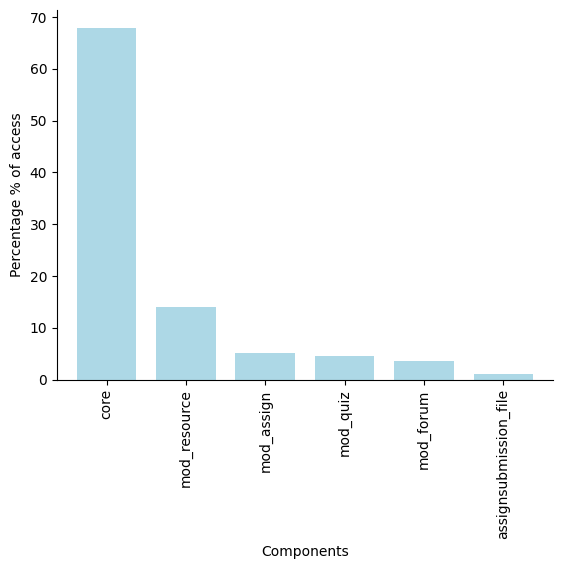

In [51]:
ax = x[x>1].plot(kind='bar',color='lightblue', width=0.75, align='center')

#ax.set_title("Components accessed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Components')
ax.set_ylabel('Percentage % of access')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticklabels)

### logy, absolute

Bbox([[25.36432671440971, -178.35277777777776], [576.0, 422.4]])

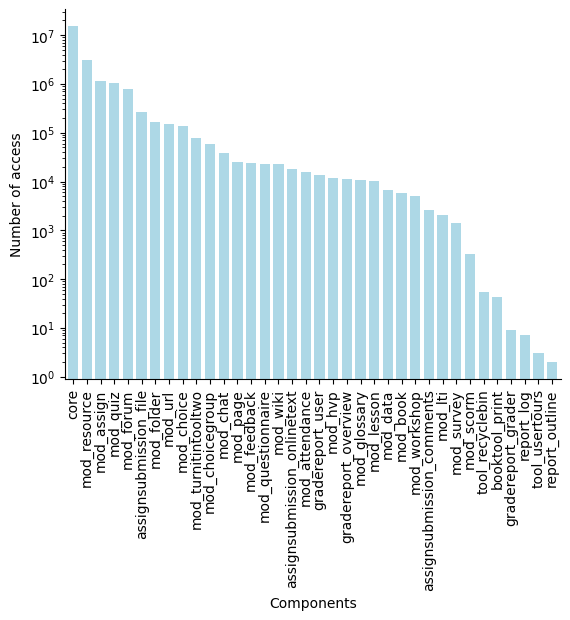

In [52]:
x = student_log4['component'].value_counts()
ax = x.plot(kind='bar',color='lightblue', width=0.75, align='center',logy=True)

#ax.set_title("Components accessed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Components')
ax.set_ylabel('Number of access')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticklabels)

## Action

In [53]:
unique_info('action')

45
['viewed' 'loggedin' 'downloaded' 'loggedout' 'uploaded' 'created'
 'submitted' 'accepted' 'started' 'graded' 'reviewed' 'sent' 'searched'
 'deleted' 'updated' 'student' 'added' 'submissions' 'submission' 'called'
 'removed' 'reset' 'becameoverdue' 'assessed' 'saved' 'resumed' 'assigned'
 'ended' 'failed' 'restarted' 'answered' 'printed' 'abandoned' 'launched'
 'reassessed' 'duplicated' 'restored' 'shown' 'previewed' 'flagged'
 'blocked' 'unblocked' 'disabled' 'enabled' 'unassigned']


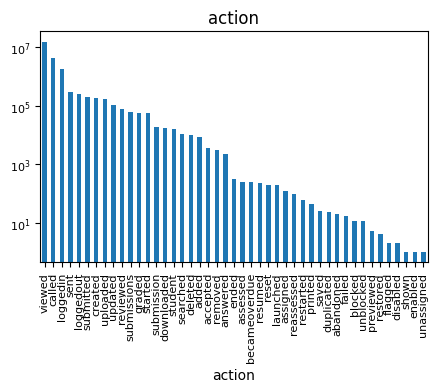

In [54]:
plot_bar('action')

In [55]:
action = student_log4['component'].value_counts()


Bbox([[25.36432671440971, -88.97777777777777], [576.1491712707182, 422.4]])

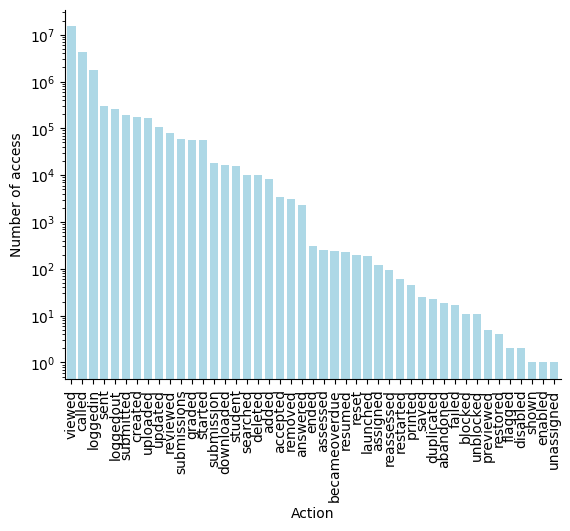

In [56]:
x = student_log4['action'].value_counts()
ax = x.plot(kind='bar',color='lightblue', width=0.75, align='center',logy=True)

#ax.set_title("Components accessed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Action')
ax.set_ylabel('Number of access')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticklabels)

## Target

In [57]:
unique_info('target')

84
['course' 'course_module' 'message' 'user' 'all_files' 'discussion'
 'submission_status' 'submission_form' 'assessable' 'submission'
 'submission_confirmation_form' 'statement' 'attempt' 'attempt_summary'
 'user_list' 'recent_activity' 'course_module_instance_list'
 'discussion_subscription' 'post' 'user_profile' 'grade_report' 'answer'
 'attendance_taken_by' 'group_member' 'choice' 'list' 'add' 'sessions'
 'badge_listing' 'course_category' 'response' 'webservice_token'
 'webservice_function' 'all_responses' 'comment' 'page_history'
 'course_module_completion' 'dashboard' 'courses' 'blog_entries'
 'user_report' 'delete' 'chapter' 'entry' 'page' 'page_locks' 'page_map'
 'comments' 'course_user_report' 'message_contact' 'subscription'
 'course_section' 'report' 'course_information' 'user_enrolment' 'role'
 'page_diff' 'lesson' 'content_page' 'user_login' 'question' 'tag'
 'folder' 'record' 'course_resources_list' 'blog_entry' 'book'
 'calendar_event' 'sco' 'attempt_preview' 'page_vers

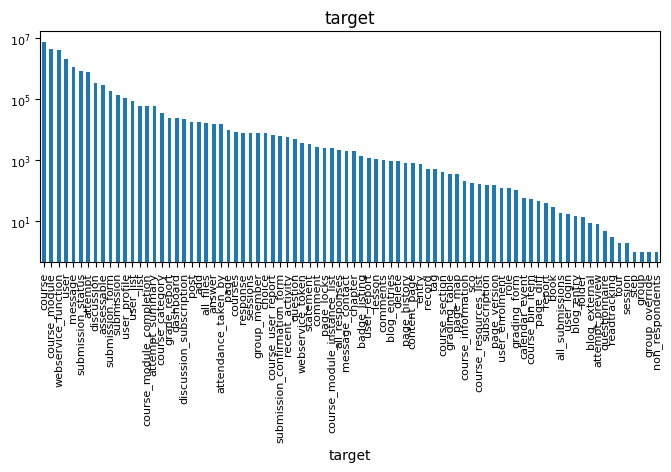

In [58]:
plot_bar('target',figsize=(8,3))

Bbox([[25.36432671440971, -188.47777777777776], [576.4391534391534, 423.840091304246]])

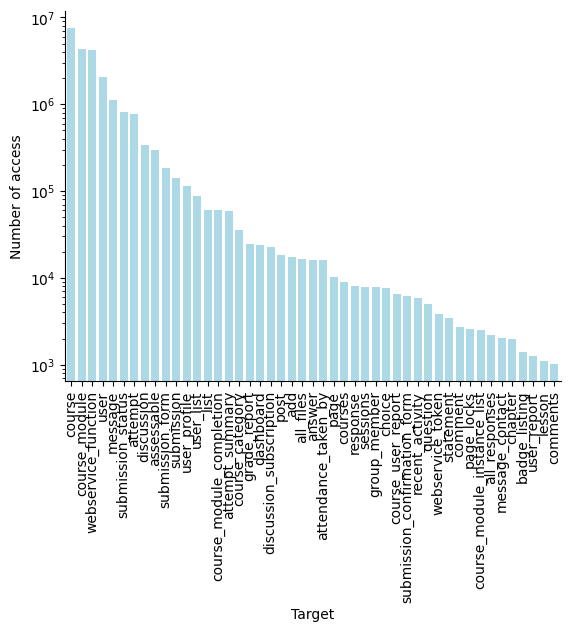

In [59]:
x = student_log4['target'].value_counts()
ax = x[x>1000].plot(kind='bar',color='lightblue', width=0.75, align='center',logy=True)

#ax.set_title("Components accessed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Target')
ax.set_ylabel('Number of access')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticklabels)

## Courseid

In [60]:
unique_info('courseid')

2828
[   1 4802    0 ...  605 2834 3813]


In [61]:
x=student_log4[['courseid','userid']].groupby(by=['courseid']).value_counts()
print(x.shape)

(131156,)


In [62]:
x = student_log4[['courseid','userid']]
x = x[x['courseid']>1 ]
x.groupby('courseid').agg('count')

,userid
courseid,
8,6025
20,77
36,38
49,12746
53,27
...,...
5280,2
5281,3
5284,7


In [63]:
y=x.groupby('courseid')['userid'].nunique()
y

courseid
8       33
20       3
36       5
49      22
53       5
        ..
5280     1
5281     1
5284     2
5287     3
5289     1
Name: userid, Length: 2826, dtype: int64

<Axes: ylabel='Frequency'>

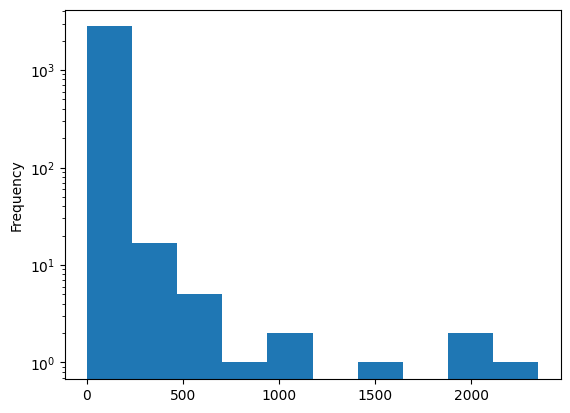

In [64]:
y.plot(kind='hist',logy=True)


In [65]:
z = y[(y==1)]
z.sort_index(ascending=True)
#z.hist()

courseid
91      1
119     1
136     1
141     1
215     1
       ..
5270    1
5276    1
5280    1
5281    1
5289    1
Name: userid, Length: 280, dtype: int64

In [66]:
y[(y>2000)]

courseid
2414    2035
2444    2004
2447    2346
Name: userid, dtype: int64

In [67]:
cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")
print(cam_cmr.columns)
#cam_cmr.head()

C:\Users\shahr\AppData\Local\Temp\ipykernel_19048\834225171.py:1: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  cam_cmr = pd.read_csv("./cam_smr_2018_Sem2.csv")


Index(['SPR Code', 'Module code', 'Occurrence', 'Academic Year code',
       'Period Slot code', 'Academic Year code.1', 'Start Period Slot code',
       'Actual mark - DB field', 'Actual grade', 'Actual mark check digit',
       'Agreed mark - DB field', 'Agreed grade', 'Agreed mark check digit',
       'Credits Passed', 'Result of Module', 'Filler', 'Sortname',
       'Formatted display Non-db', 'Formatted agreed mark', 'Current Attempt',
       'Completed number', 'Initial SAS status', 'Process Status',
       'Process status', 'Year of entry', 'Scheme code', 'Level code',
       'Credit Value', 'Level rank', 'Mark Scheme code',
       'Validating Body code', 'Student Candidate Number', 'Title',
       'Number of periods', 'high mark', 'high grade', 'Re-take module',
       'Registration type code', 'Module Selection Status', 'Calculated Mark',
       'Formatted Display Non DB', 'Calculated Grade', 'Latest Mark',
       'Formatted Display Non DB.1', 'Latest Grade', 'Final assess dat

In [68]:
#cam_cmr[cam_cmr['courseid']==91]

## Objecttable

In [69]:
unique_info('objecttable')

68
[nan 'resource' 'message_read' 'user' 'folder' 'forum_discussions' 'forum'
 'assign_submission' 'assignsubmission_file' 'quiz' 'quiz_attempts'
 'grade_grades' 'url' 'course' 'forum_posts' 'forum_discussion_subs'
 'choice' 'choice_answers' 'attendance_log' 'choicegroup' 'groups' 'page'
 'chat' 'turnitintooltwo' 'course_categories' 'questionnaire' 'hvp'
 'external_tokens' 'assignsubmission_onlinetext' 'data' 'comments'
 'feedback' 'wiki' 'wiki_pages' 'course_modules_completion'
 'chat_messages' 'lti' 'glossary' 'book_chapters' 'glossary_entries'
 'book' 'feedback_completed' 'message_contacts' 'workshop' 'survey'
 'workshop_submissions' 'forum_subscriptions' 'course_sections'
 'workshop_assessments' 'user_enrolments' 'role' 'lesson' 'lesson_pages'
 'scorm' 'tag' 'tag_instance' 'data_records' 'post' 'event' 'scorm_scoes'
 'course_modules' 'attendance_sessions' 'wiki_versions'
 'tool_usertours_tours' 'tool_usertours_steps' 'tool_recyclebin_course'
 'assign_overrides' 'assign_grades' 'ass

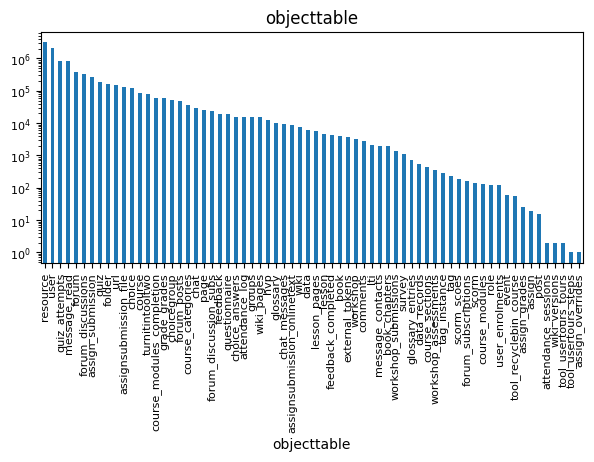

In [70]:
plot_bar('objecttable',figsize=(7,3))

Bbox([[25.36432671440971, -175.10277777777776], [576.2972972972973, 422.4]])

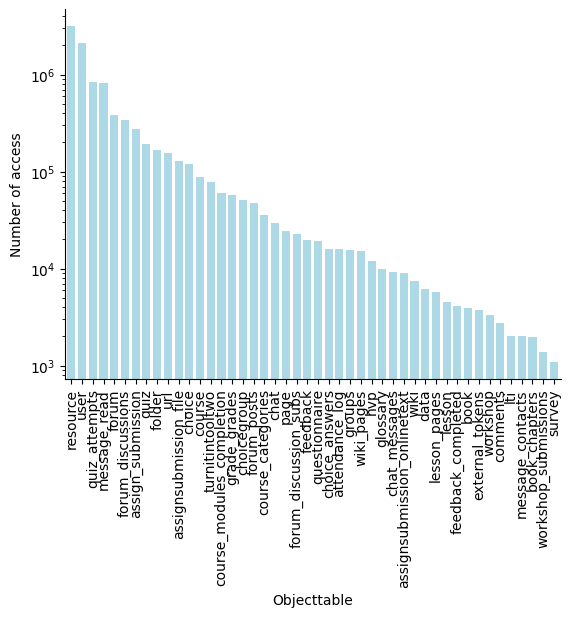

In [71]:
x = student_log4['objecttable'].value_counts()
ax = x[x>1000].plot(kind='bar',color='lightblue', width=0.75, align='center',logy=True)

#ax.set_title("Components accessed")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Objecttable')
ax.set_ylabel('Number of access')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticklabels)

# EDA Student_activity_summary

In [72]:
Student_activity_summary.head()

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
0,64.0,6.0,60.483333,28.000000,4.000000,24.000000,7.166667,5.500000,5.333333,6.833333,1.666667,1.500000,213.666667,0.333333,0.166667,2.666667,0.000000,2.833333,0.666667,1.333333,0.0
1,65.0,6.0,53.650000,14.666667,0.833333,13.833333,4.833333,2.500000,2.333333,4.166667,0.333333,0.500000,40.166667,0.166667,0.166667,1.833333,0.000000,1.500000,0.833333,1.833333,0.0
2,66.0,7.0,67.514286,21.000000,3.428571,17.571429,9.000000,4.428571,1.714286,5.428571,0.142857,0.285714,215.428571,0.000000,0.000000,4.142857,0.285714,0.428571,0.142857,0.142857,0.0
3,67.0,6.0,71.566667,19.166667,2.500000,16.666667,6.333333,2.666667,1.666667,7.833333,0.333333,0.333333,99.833333,1.666667,0.000000,6.000000,0.333333,0.000000,0.000000,0.000000,0.0
4,68.0,7.0,85.782857,29.000000,5.000000,24.000000,12.142857,5.571429,3.571429,7.000000,0.714286,0.000000,137.285714,2.571429,1.285714,6.000000,0.285714,0.285714,0.000000,0.000000,0.0


## total_login

min 0.0
max 366.0
total_login
0.0    129
Name: count, dtype: int64


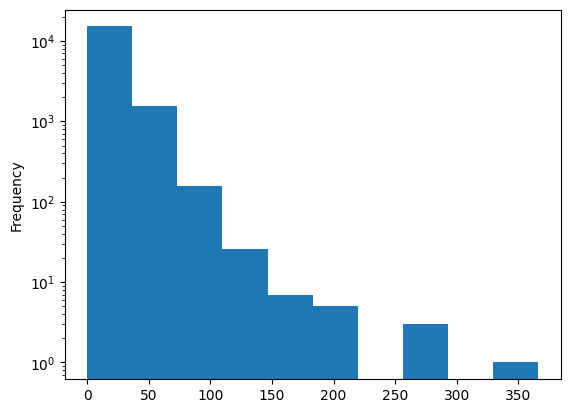

In [73]:
#final_df4['total_login'].hist()

def stats_basic(colName):

    Student_activity_summary[colName].plot(kind='hist', logy=True)

    print('min',Student_activity_summary[colName].min())
    print('max',Student_activity_summary[colName].max())


colName = 'total_login'
stats_basic(colName)

print(Student_activity_summary[colName][Student_activity_summary[colName]==0].value_counts())


In [74]:
Student_activity_summary[Student_activity_summary['total_login']>300]

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
13299,17344.0,1.0,70.0,366.0,128.0,238.0,60.0,67.0,137.0,88.0,7.0,7.0,293.0,0.0,0.0,2.0,2.0,4.0,1.0,28.0,0.0


## total_marks

min 0.0
max 100.0
total_marks
0.0    746
Name: count, dtype: int64
total_marks
100.0    2
Name: count, dtype: int64


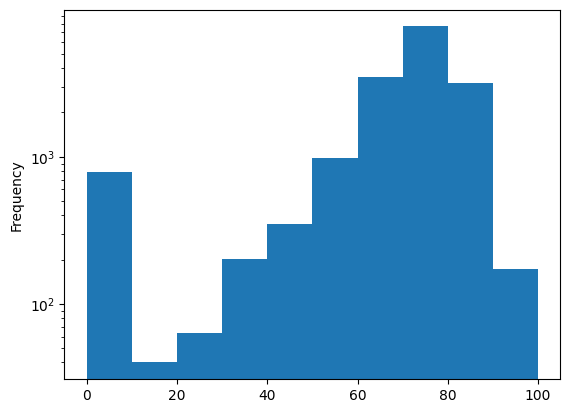

In [75]:
colName = 'total_marks'
stats_basic(colName)
print(final_df4[colName][final_df4[colName]==0].value_counts())
print(final_df4[colName][final_df4[colName]==100].value_counts())


## no_of_assignments

min 0.0
max 21.0
no_of_assignments
0.0    3641
Name: count, dtype: int64


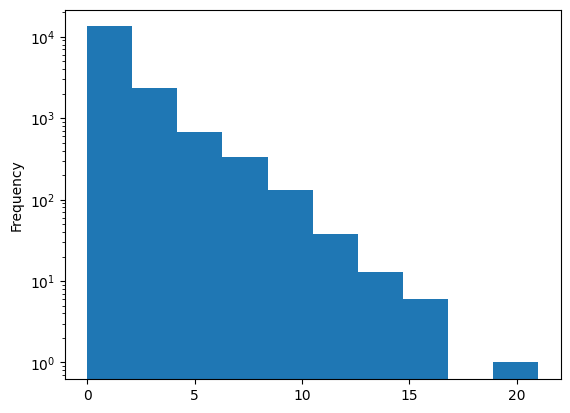

In [76]:
colName = 'no_of_assignments'
stats_basic(colName)
print(final_df4[colName][final_df4[colName]==0].value_counts())


## boxplot all

(16909, 20)


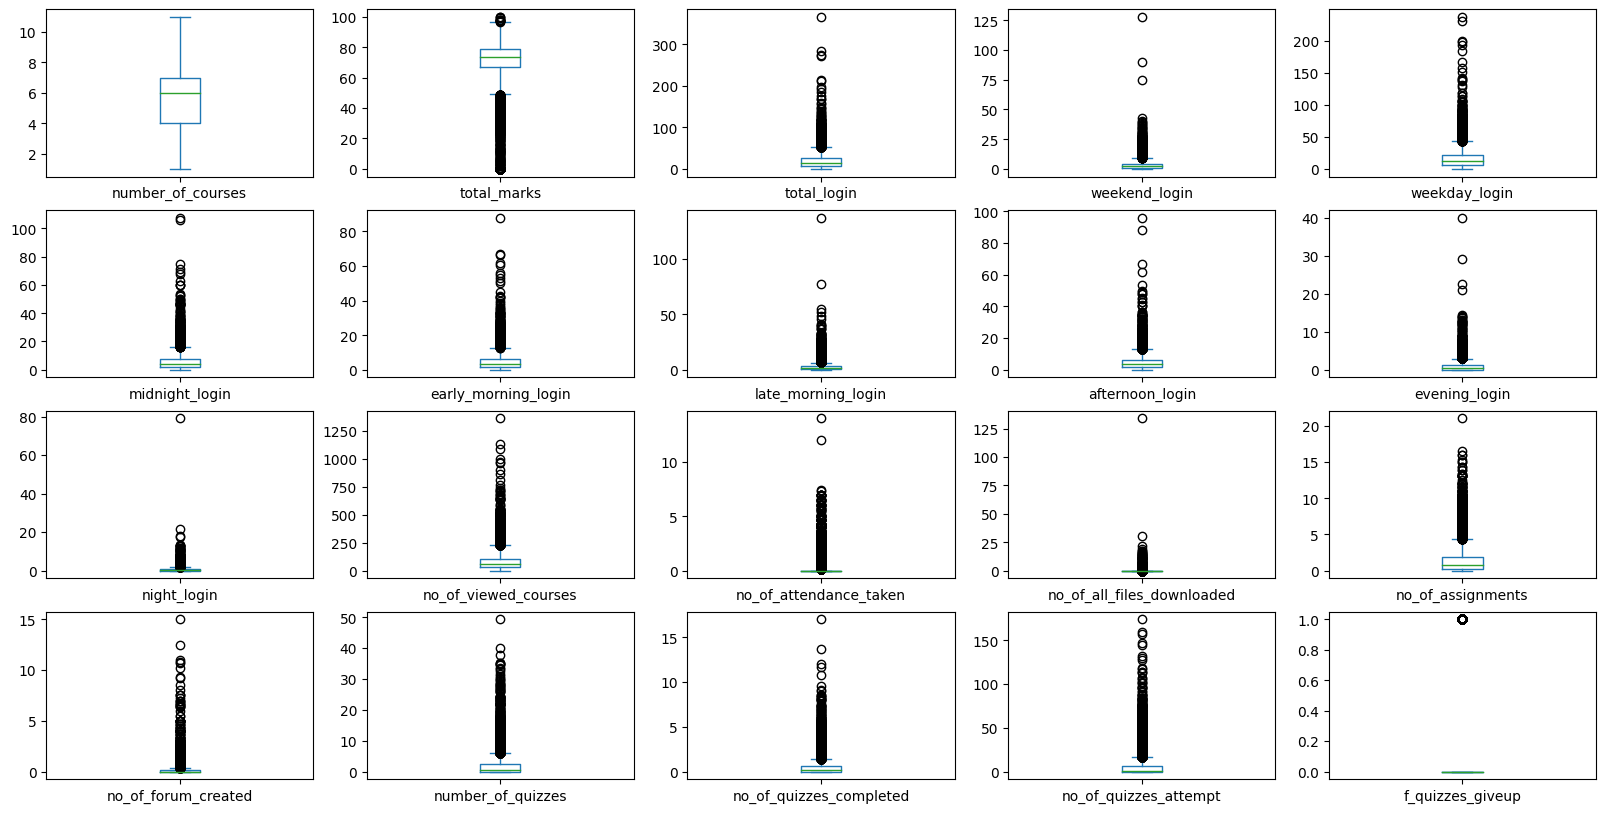

In [77]:
boxdf = Student_activity_summary.loc[:,Student_activity_summary.columns != 'userid']
print(boxdf.shape)



fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(20,10))
i=0
j=0
for col in boxdf.columns:
    #print(col)
    boxdf[col].plot(kind='box',ax=axes[i,j])
    j+=1
    #print(f'{i}, {j}')
    
    if(j>4):
        i+=1
        j=0
    

#Student_activity_summary.boxplot()

## scatterplot all

c:\Users\shahr\code\.mlenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


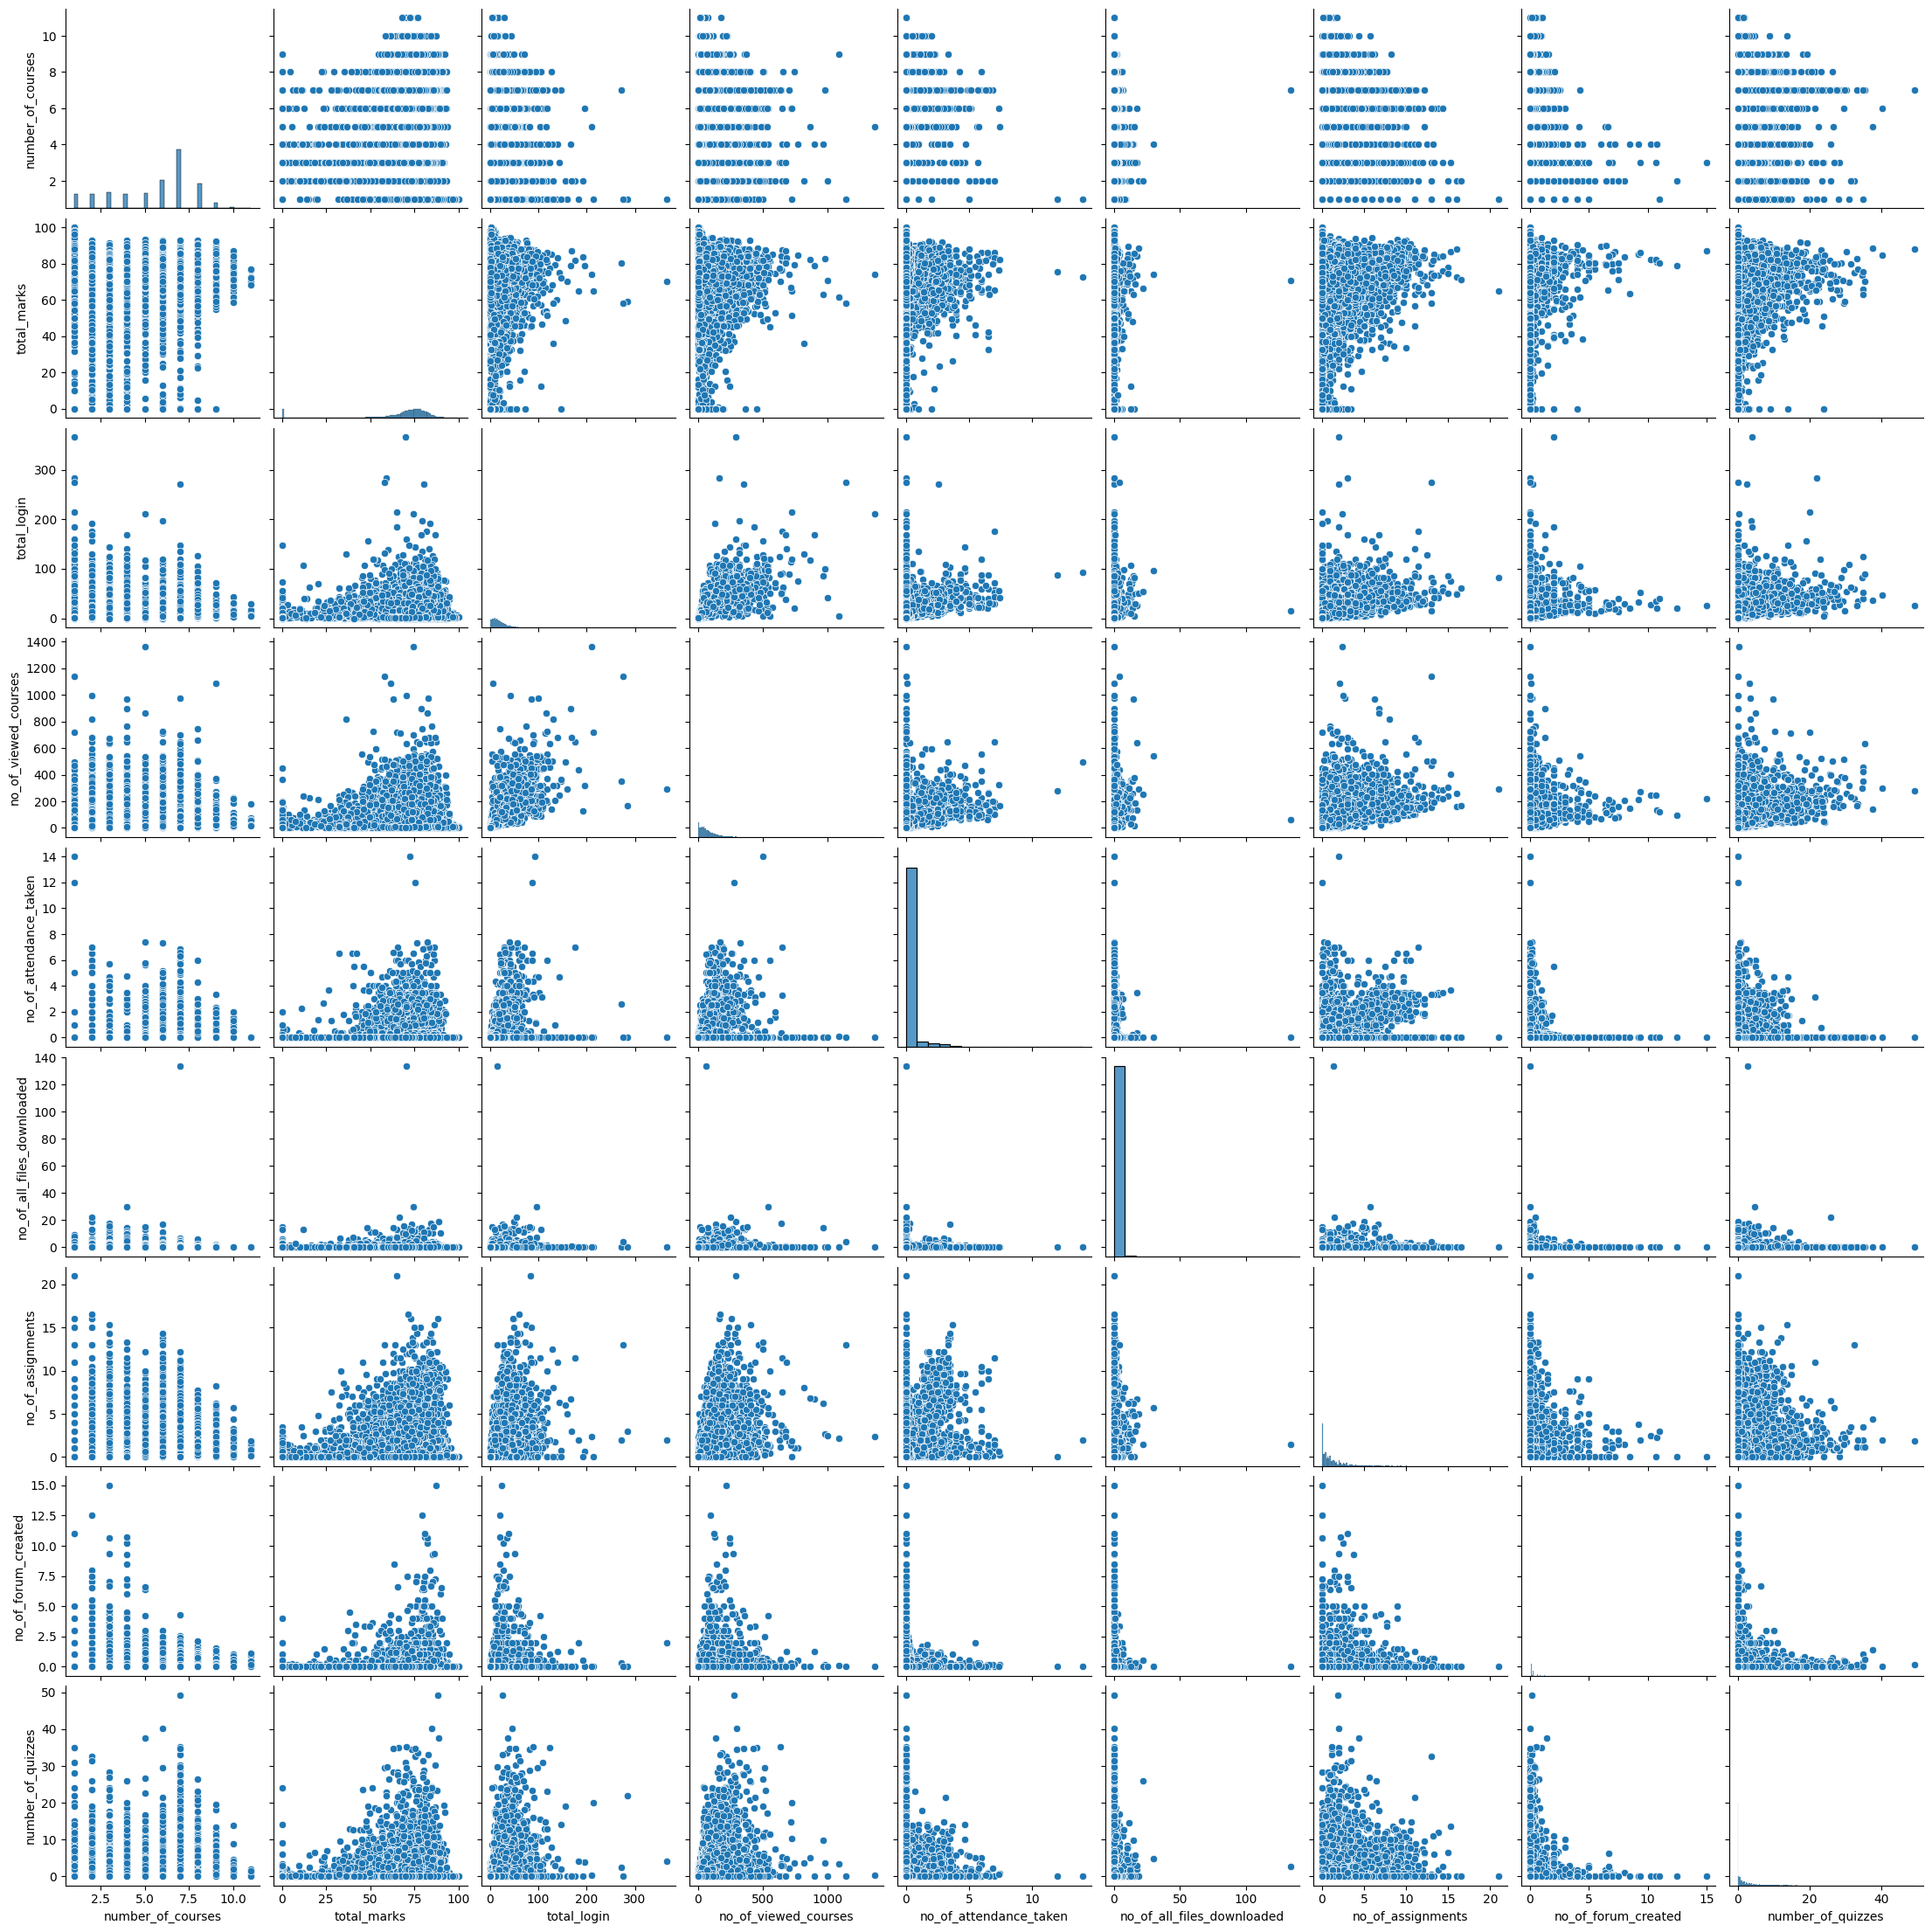

In [78]:
scatdf = Student_activity_summary
scatdf.columns

scatdf = scatdf[['number_of_courses','total_marks','total_login','no_of_viewed_courses','no_of_attendance_taken','no_of_all_files_downloaded','no_of_assignments','no_of_forum_created','number_of_quizzes']]

import seaborn as sns
sns.pairplot(scatdf)

## correlation

In [79]:

scatdf.corr()

,number_of_courses,total_marks,total_login,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes
number_of_courses,1.000000,0.346477,0.007965,0.056709,0.036328,-0.035194,0.068273,-0.051660,0.186626
total_marks,0.346477,1.000000,0.163625,0.154316,0.042442,-0.014840,0.177134,0.082990,0.121683
total_login,0.007965,0.163625,1.000000,0.808885,0.225040,0.089675,0.460763,0.107123,0.344643
no_of_viewed_courses,0.056709,0.154316,0.808885,1.000000,0.214070,0.102462,0.449417,0.124932,0.387891
no_of_attendance_taken,0.036328,0.042442,0.225040,0.214070,1.000000,0.023038,0.325176,-0.018134,0.037003
no_of_all_files_downloaded,-0.035194,-0.014840,0.089675,0.102462,0.023038,1.000000,0.094591,-0.004312,0.032741
no_of_assignments,0.068273,0.177134,0.460763,0.449417,0.325176,0.094591,1.000000,0.061227,0.179209
no_of_forum_created,-0.051660,0.082990,0.107123,0.124932,-0.018134,-0.004312,0.061227,1.000000,-0.015823
number_of_quizzes,0.186626,0.121683,0.344643,0.387891,0.037003,0.032741,0.179209,-0.015823,1.000000


<Axes: >

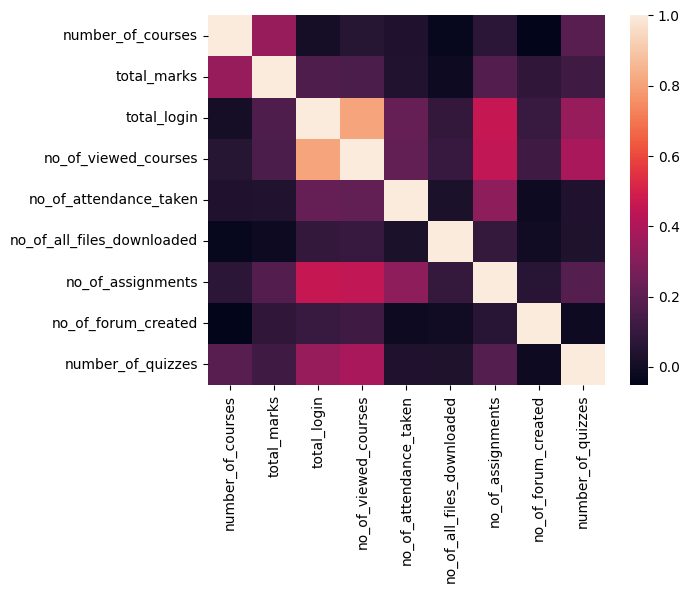

In [80]:
import seaborn as sns
sns.heatmap(scatdf.corr())

## total_logins vs total_marks

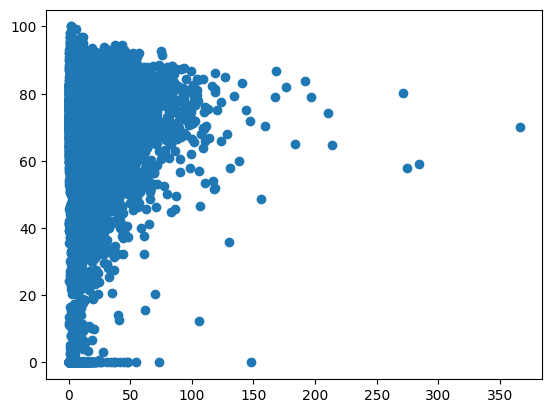

In [81]:
#Student_activity_summary[Student_activity_summary['total_marks']>=90]["total_login"].hist()
x = Student_activity_summary['total_login']
y = Student_activity_summary['total_marks']
plt.scatter(x,y)

In [82]:
avg_grade_marks = {
    "A+": 95,
    "A": 85,
    "A-": 77,
    "B+": 73,
    "B": 67,
    "B-": 63,
    "C+": 57,
    "C": 53,
    "C-": 47,
    "D+": 43,
    "D": 37,
    "F": 18
}
cam_cmr.loc[cam_cmr["Formatted agreed mark"] > 100, "Formatted agreed mark"] = cam_cmr[cam_cmr["Formatted agreed mark"] > 100]["high grade"].progress_apply(lambda x: avg_grade_marks[x])

100%|██████████| 1010/1010 [00:00<00:00, 161917.48it/s]


# EDA Grade aggregated

In [83]:
print(final_grade_df3.shape)
final_grade_df3.head()

(16909, 5)


,userid,idnumber,NO_MATRIK_LAMA,number_of_courses,total_marks
0,64,WIF160010,WIF160010,6.0,362.90
1,65,WIF160052,WIF160052,6.0,321.90
2,66,WIE160015,WIE160015,7.0,472.60
3,67,WIC160061,WIC160061,6.0,429.40
4,68,WIC160008,WIC160008,7.0,600.48


## number_of_courses

In [84]:
print(final_grade_df3['number_of_courses'].median())
print(final_grade_df3['number_of_courses'].mode())

final_grade_df3['number_of_courses'].describe()

6.0
0    7.0
Name: number_of_courses, dtype: float64


count    16909.000000
mean         5.511798
std          2.256328
min          1.000000
25%          4.000000
50%          6.000000
75%          7.000000
max         11.000000
Name: number_of_courses, dtype: float64

Bbox([[5.097222222222218, -20.902777777777786], [450.0, 264.0]])

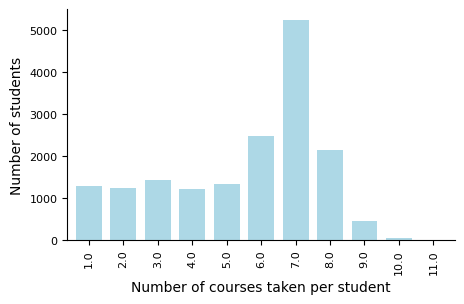

In [85]:

ax =final_grade_df3['number_of_courses'].value_counts().sort_index().plot(kind='bar',logy=False,fontsize=8, figsize=(5,3),color='lightblue',
                                                                          width=0.75,align='center')


ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Number of courses taken per student')
ax.set_ylabel('Number of students')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()



In [86]:
final_df4.head()

,userid,number_of_courses,total_marks,total_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,evening_login,night_login,no_of_viewed_courses,no_of_attendance_taken,no_of_all_files_downloaded,no_of_assignments,no_of_forum_created,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,f_quizzes_giveup
0,64.0,6.0,60.483333,28.000000,4.000000,24.000000,7.166667,5.500000,5.333333,6.833333,1.666667,1.500000,213.666667,0.333333,0.166667,2.666667,0.000000,2.833333,0.666667,1.333333,0.0
1,65.0,6.0,53.650000,14.666667,0.833333,13.833333,4.833333,2.500000,2.333333,4.166667,0.333333,0.500000,40.166667,0.166667,0.166667,1.833333,0.000000,1.500000,0.833333,1.833333,0.0
2,66.0,7.0,67.514286,21.000000,3.428571,17.571429,9.000000,4.428571,1.714286,5.428571,0.142857,0.285714,215.428571,0.000000,0.000000,4.142857,0.285714,0.428571,0.142857,0.142857,0.0
3,67.0,6.0,71.566667,19.166667,2.500000,16.666667,6.333333,2.666667,1.666667,7.833333,0.333333,0.333333,99.833333,1.666667,0.000000,6.000000,0.333333,0.000000,0.000000,0.000000,0.0
4,68.0,7.0,85.782857,29.000000,5.000000,24.000000,12.142857,5.571429,3.571429,7.000000,0.714286,0.000000,137.285714,2.571429,1.285714,6.000000,0.285714,0.285714,0.000000,0.000000,0.0


## total_marks

<Axes: >

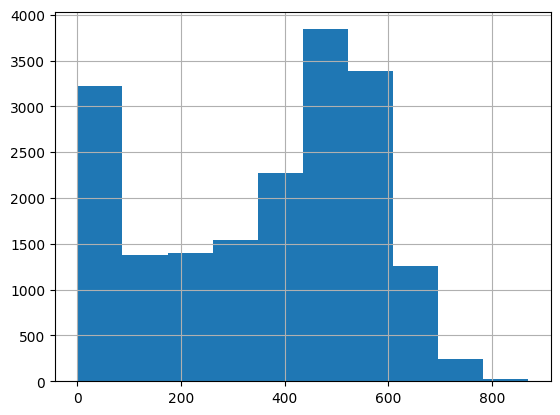

In [87]:
#print(final_grade_df2['total_marks'].max())

#final_grade_df2[final_grade_df2['total_marks']>1500]

#final_grade_df2['total_marks'].value_counts().sort_index().plot(kind='box',logy=False,fontsize=8, figsize=(5,3))
final_grade_df2['total_marks'].hist()
#final_grade_df2[final_grade_df2['total_marks']<20]['total_marks'].hist()
#final_grade_df2[final_grade_df2['total_marks']<20]
#final_grade_df2.size

# EDA Grade Detail

In [88]:
print('Number of courses',grade_detail_publish['id'].nunique())
print('Number of faculty',grade_detail_publish['faculty'].nunique())
print(grade_detail_publish.shape)
grade_detail_publish.head()

Number of courses 2407
Number of faculty 21
(90089, 5)


,userid,id,Formatted agreed mark,Actual grade,faculty
0,64,109,68.5,B,Faculty of Computer Science & Information Tech...
1,65,109,66.5,B,Faculty of Computer Science & Information Tech...
2,66,109,76.6,A-,Faculty of Computer Science & Information Tech...
3,67,109,87.5,A,Faculty of Computer Science & Information Tech...
4,68,109,91.0,A+,Faculty of Computer Science & Information Tech...


## Student per faculty

Bbox([[-26.04190117154053, -255.69656799881574], [576.0, 422.4]])

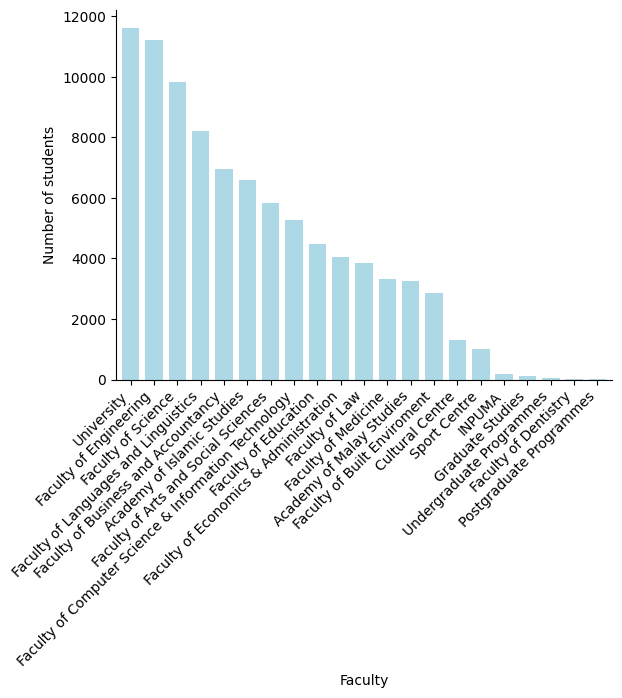

In [89]:
ax = grade_detail_publish['faculty'].value_counts().plot(kind='bar', color='lightblue', width=0.75, align='center')
#ax.set_title("Faculty")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('Faculty')
plt.xticks(rotation=45, ha='right')

ax.set_ylabel('Number of students')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
#ax.set_yticks(yticks)
#ax.set_yticklabels(yticklabels)

## Courses per faculty

(2407, 2)


Bbox([[-62.29442909021543, -255.69656799881574], [576.0, 422.4]])

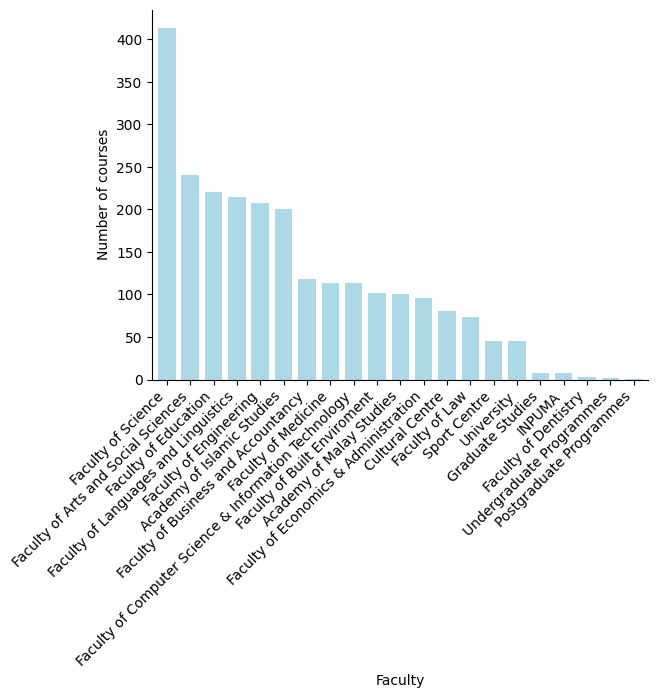

In [90]:
x = grade_detail_publish[['id','faculty']]

x = x.drop_duplicates(subset=['id'])
print(x.shape)
x.head()

ax = x['faculty'].value_counts().plot(kind='bar',color='lightblue', width=0.75, align='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Faculty')
plt.xticks(rotation=45, ha='right')

ax.set_ylabel('Number of courses')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()


## Students+courses per faculty

In [91]:
a = grade_detail_publish[['id','faculty']]

a = a.drop_duplicates(subset=['id'])

a = a['faculty'].value_counts()

print(a.shape)
a

(21,)


faculty
Faculty of Science                                      414
Faculty of Arts and Social Sciences                     240
Faculty of Education                                    220
Faculty of Languages and Linguistics                    215
Faculty of Engineering                                  208
Academy of Islamic Studies                              201
Faculty of Business and Accountancy                     118
Faculty of Medicine                                     114
Faculty of Computer Science & Information Technology    113
Faculty of Built Enviroment                             102
Academy of Malay Studies                                101
Faculty of Economics & Administration                    96
Cultural Centre                                          80
Faculty of Law                                           73
Sport Centre                                             45
University                                               45
Graduate Studies                

In [92]:
b = grade_detail_publish['faculty'].value_counts()
print(b.shape)
b

(21,)


faculty
University                                              11636
Faculty of Engineering                                  11234
Faculty of Science                                       9849
Faculty of Languages and Linguistics                     8201
Faculty of Business and Accountancy                      6973
Academy of Islamic Studies                               6593
Faculty of Arts and Social Sciences                      5823
Faculty of Computer Science & Information Technology     5267
Faculty of Education                                     4490
Faculty of Economics & Administration                    4053
Faculty of Law                                           3850
Faculty of Medicine                                      3311
Academy of Malay Studies                                 3260
Faculty of Built Enviroment                              2844
Cultural Centre                                          1311
Sport Centre                                             1012


In [93]:
c = pd.merge(b,a,left_index=True,right_index=True)
c = c.rename(columns={'count_x':"Students","count_y":"Courses"})
c

,Students,Courses
faculty,,
University,11636,45
Faculty of Engineering,11234,208
Faculty of Science,9849,414
Faculty of Languages and Linguistics,8201,215
Faculty of Business and Accountancy,6973,118
Academy of Islamic Studies,6593,201
Faculty of Arts and Social Sciences,5823,240
Faculty of Computer Science & Information Technology,5267,113
Faculty of Education,4490,220


Bbox([[26.40277777777777, -357.35277777777776], [576.0, 422.4]])

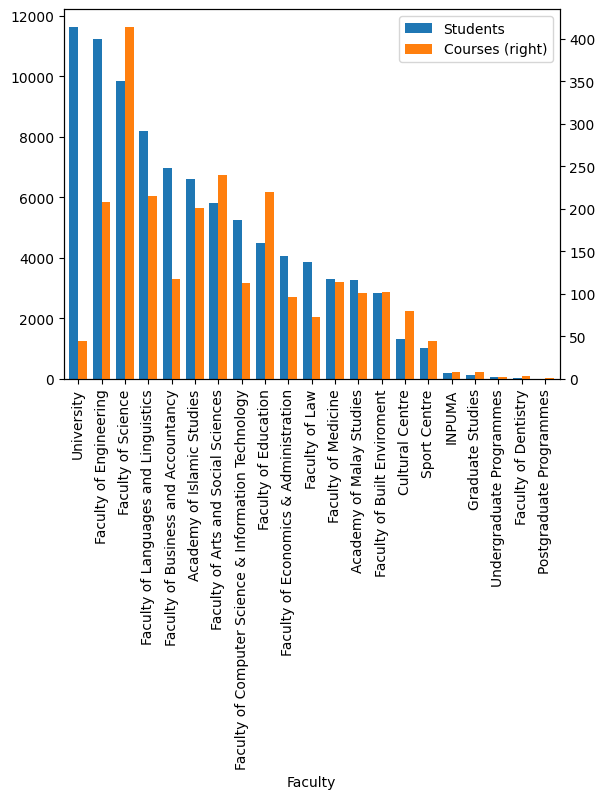

In [94]:
ax = c.plot(kind='bar', secondary_y='Courses', width=0.75, align='center')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
ax.set_xlabel('Faculty')
#ax.set_ylabel('Number of students')    
#yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
#yticklabels = yticks
plt.xticks(rotation=45, ha='right')
    
ax.get_tightbbox()


## Median marks by faculty

Bbox([[-49.82502486323024, -255.69656799881574], [576.0, 422.4]])

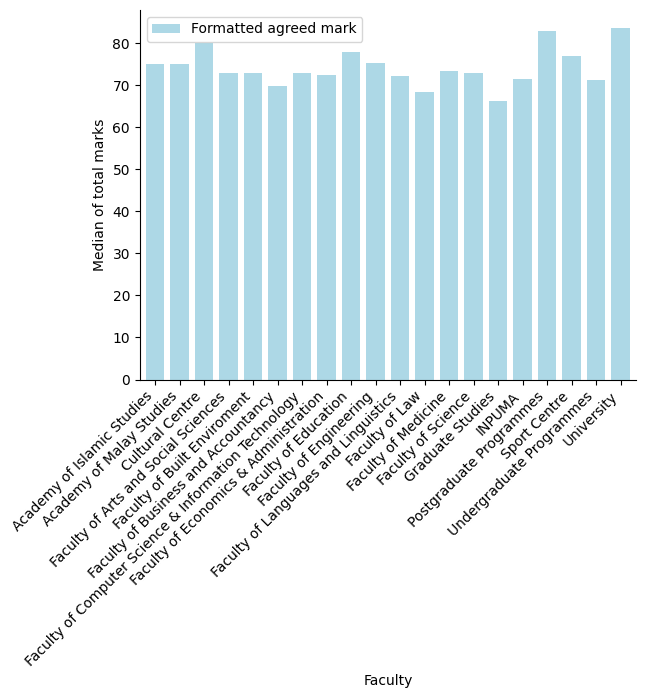

In [95]:
d = grade_detail_publish[['faculty','Formatted agreed mark']]
d= d[d['faculty']!='Faculty of Dentistry']


d = d.groupby('faculty').aggregate('median')
ax=d.plot(kind='bar',color='lightblue', width=0.75, align='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Faculty')
plt.xticks(rotation=45, ha='right')

ax.set_ylabel('Median of total marks')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()




"\nmedianprops = {'color': 'red', 'linewidth': 2}\nboxprops = {'color': 'black', 'linestyle': '-'}\nwhiskerprops = {'color': 'black', 'linestyle': '-'}\ncapprops = {'color': 'black', 'linestyle': '-'}\nflierprops = {'color': 'black', 'marker': 'x'}\n    \nax.boxplot(y,\n               positions=x,\n               medianprops=medianprops,\n               boxprops=boxprops,\n               whiskerprops=whiskerprops,\n               capprops=capprops,\n               flierprops=flierprops)\n    \nax.set_xlim(xlims)\nax.set_ylim(ylims)\n\nax.spines['top'].set_visible(False)\nax.spines['right'].set_visible(False)\n\nax.set_xlabel('Faculty')\n\nax.set_ylabel('Median of total marks')\n    \nyticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)\nyticklabels = yticks\n    \nax.get_tightbbox()\n"

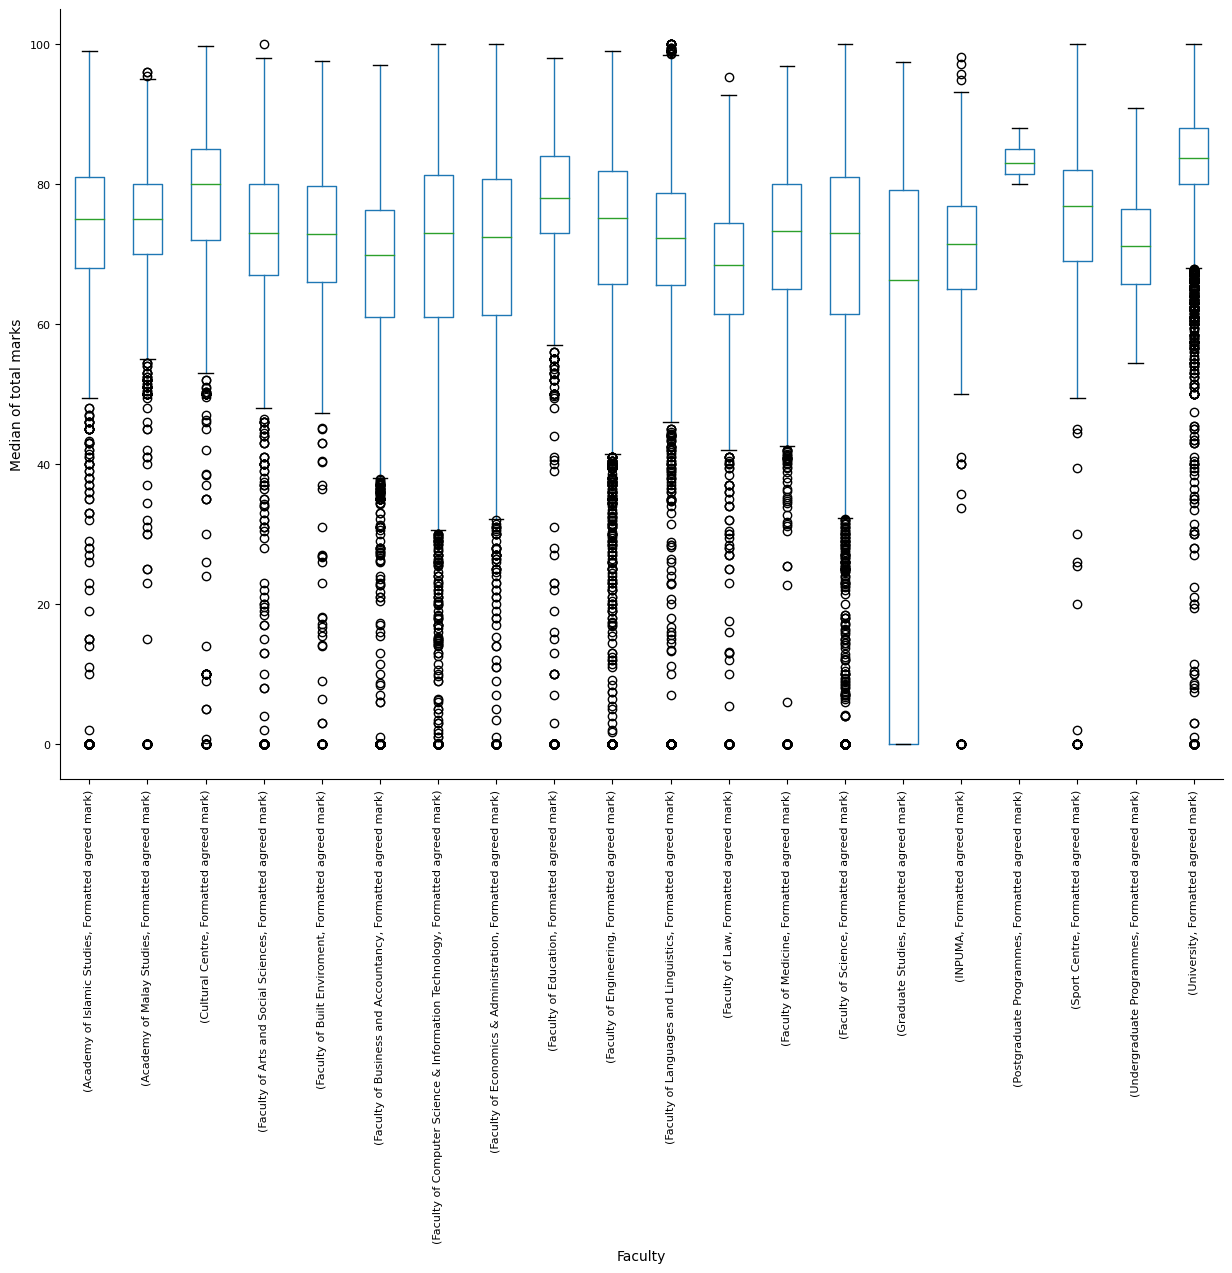

In [96]:
d = grade_detail_publish[['faculty','Formatted agreed mark']]

d= d[d['faculty']!='Faculty of Dentistry']


ax = d.groupby('faculty').boxplot(subplots=False,rot=90,fontsize=8, figsize=(15,10),grid=False,sharey=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Faculty')

ax.set_ylabel('Median of total marks')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
'''
medianprops = {'color': 'red', 'linewidth': 2}
boxprops = {'color': 'black', 'linestyle': '-'}
whiskerprops = {'color': 'black', 'linestyle': '-'}
capprops = {'color': 'black', 'linestyle': '-'}
flierprops = {'color': 'black', 'marker': 'x'}
    
ax.boxplot(y,
               positions=x,
               medianprops=medianprops,
               boxprops=boxprops,
               whiskerprops=whiskerprops,
               capprops=capprops,
               flierprops=flierprops)
    
ax.set_xlim(xlims)
ax.set_ylim(ylims)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Faculty')

ax.set_ylabel('Median of total marks')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()
'''



In [97]:
d

,faculty,Formatted agreed mark
0,Faculty of Computer Science & Information Tech...,68.5
1,Faculty of Computer Science & Information Tech...,66.5
2,Faculty of Computer Science & Information Tech...,76.6
3,Faculty of Computer Science & Information Tech...,87.5
4,Faculty of Computer Science & Information Tech...,91.0
...,...,...
90084,Faculty of Education,83.0
90085,Faculty of Built Enviroment,66.0
90086,Cultural Centre,92.0
90087,Academy of Islamic Studies,0.0


## Actual grade

Bbox([[6.847222222222211, 20.452777777777776], [576.0, 444.7333333333333]])

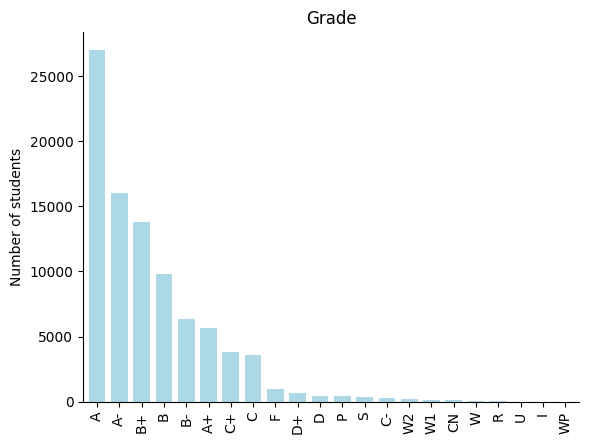

In [103]:
col = 'Actual grade'
ax = grade_detail_publish[col].value_counts().plot(kind='bar',color='lightblue', width=0.75, align='center')
#ax = grade_detail_publish[col].value_counts().plot(kind='bar',color='lightblue', width=0.75, align='center',
#                                                   use_index=['A+','A','A-','B+','B','B-','C+','C','C-','D+',
#                                                              'D','P','S','W2','W1','CN','W','R','U','I','WP'])

ax.set_title("Grade")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.xaxis.set_tick_params(top='off', direction='out', width=1)
#ax.yaxis.set_tick_params(right='off', direction='out', width=1)

ax.set_xlabel('')
ax.set_ylabel('Number of students')
    
yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
yticklabels = yticks
    
ax.get_tightbbox()


## formatted agreed mark

Median mark is : 75.0
Mean mark is : 72.24001953623637
std dev is : 16.00745259987663


Bbox([[6.847222222222211, 9.522222222222219], [576.0, 422.4]])

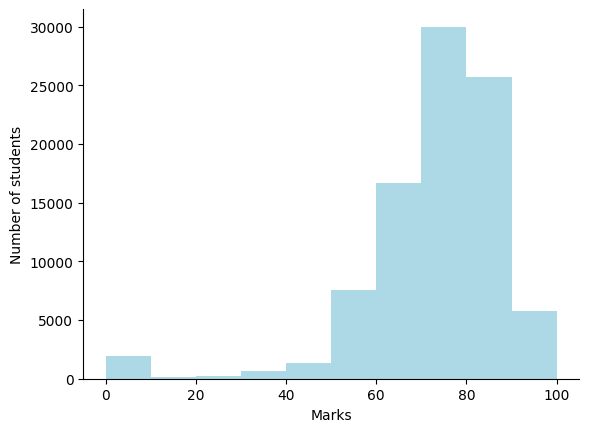

In [105]:

col = 'Formatted agreed mark'
print('Median mark is :',grade_detail_publish[col].median())
print('Mean mark is :',grade_detail_publish[col].mean())

print('std dev is :',grade_detail_publish[col].std())

ax = grade_detail_publish[col].hist(color='lightblue',align='mid',grid=False)
#ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Marks')
ax.set_ylabel('Number of students')
    
#yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
#yticklabels = yticks
    
ax.get_tightbbox()


<Axes: >

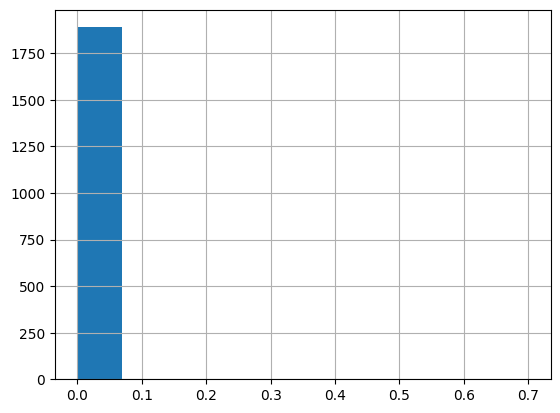

In [100]:
grade_detail_publish[grade_detail_publish['Formatted agreed mark']<1]['Formatted agreed mark'].hist()

Bbox([[24.34722222222221, 0.8972222222222204], [576.0, 422.4]])

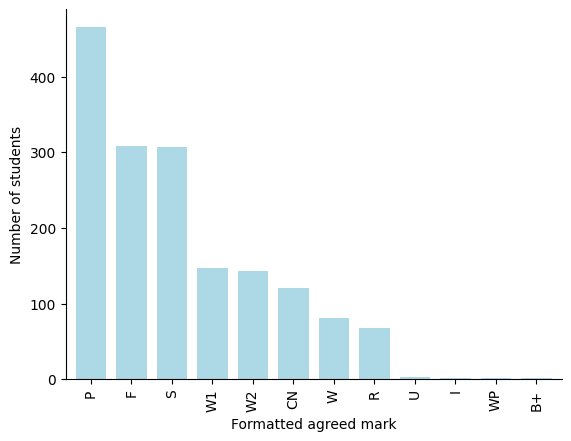

In [101]:
ax = grade_detail_publish[grade_detail_publish['Formatted agreed mark']<1]['Actual grade'].value_counts().plot(kind='bar',color='lightblue', width=0.75, align='center')


#ax.set_title("")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Formatted agreed mark')
ax.set_ylabel('Number of students')
    
#yticks = np.linspace(ax.get_ylim()[0], ax.get_ylim()[1], 5)
#yticklabels = yticks
    
ax.get_tightbbox()

# Publication quality plot-exercise

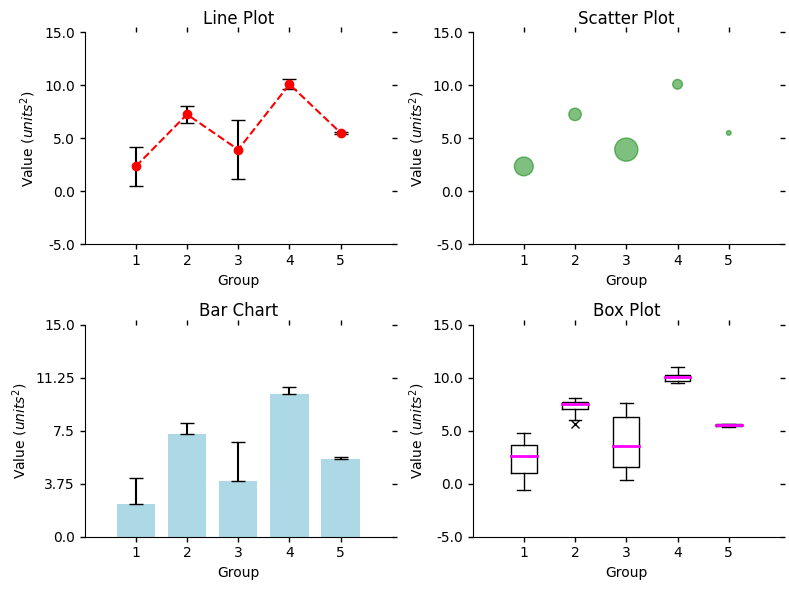

In [102]:

# Specify the mean and standard deviation for each mock data group
data_specs = [(2, 2), (7, 1), (4, 2.5), (10, 0.5), (5.5, 0.1)]

# Generate data and place into a pandas DataFrame
data = [np.random.normal(mu, sigma, 10) for mu, sigma in data_specs]
data = pd.DataFrame(data).T
data.columns = ['Group_%s' % n for n in range(1,6)]
def custom_lineplot(ax, x, y, error, xlims, ylims, color='red'):
    """Customized line plot with error bars."""
    
    ax.errorbar(x, y, yerr=error, color=color, ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_scatterplot(ax, x, y, error, xlims, ylims, color='green', markerscale=100):
    """Customized scatter plot where marker size is proportional to error measure."""
    
    markersize = error * markerscale
    
    ax.scatter(x, y, color=color, marker='o', s=markersize, alpha=0.5)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_barchart(ax, x, y, error, xlims, ylims, error_kw, color='lightblue', width=0.75):
    """Customized bar chart with positive error bars only."""
    
    error = [np.zeros(len(error)), error]
    
    ax.bar(x, y, color=color, width=width, yerr=error, error_kw=error_kw, align='center')
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_boxplot(ax, x, y, error, xlims, ylims, mediancolor='magenta'):
    """Customized boxplot with solid black lines for box, whiskers, caps, and outliers."""
    
    medianprops = {'color': mediancolor, 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-'}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    
    ax.boxplot(y,
               positions=x,
               medianprops=medianprops,
               boxprops=boxprops,
               whiskerprops=whiskerprops,
               capprops=capprops,
               flierprops=flierprops)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax

def stylize_axes(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))
means = data.mean()
x = np.arange(len(means))

y = data.mean()
y_all = data.values
x = np.arange(len(means))
error = data.std()

xlims = (-1, 5)
ylims = (-5, 15)
bar_ylims = (0, 15)

error_kw = {'capsize': 5, 'capthick': 1, 'ecolor': 'black'}


custom_lineplot(ax[0][0], x, y, error, xlims, ylims)
custom_scatterplot(ax[0][1], x, y, error, xlims, ylims)
custom_barchart(ax[1][0], x, y, error, xlims, bar_ylims, error_kw)
custom_boxplot(ax[1][1], x, y_all, error, xlims, ylims)

titles = ['Line Plot', 'Scatter Plot', 'Bar Chart', 'Box Plot']
xlabel = 'Group'
ylabel = 'Value ($units^2$)'
xticks = x
xticklabels = range(1,6)

for i, axes in enumerate(ax.flat):
    # Customize y ticks on a per-axes basis
    yticks = np.linspace(axes.get_ylim()[0], axes.get_ylim()[1], 5)
    yticklabels = yticks
    stylize_axes(axes, titles[i], xlabel, ylabel, xticks, yticks, xticklabels, yticklabels)
    
fig.tight_layout()